In [1]:
# 합성곱  신경망
# cnn 
# 컨브넷
# 28, 28 , 1
import tensorflow as tf
from tensorflow.keras import layers
inputs = tf.keras.Input(shape = (28,28,1))
conv = layers.Conv2D(32,(3,3), activation='relu')(inputs)
conv = layers.MaxPooling2D()(conv)
conv = layers.Conv2D(64,(3,3), activation ='relu')(conv)
conv = layers.MaxPooling2D()(conv)
conv = layers.Conv2D(128,(3,3), activation ='relu')(conv)

In [2]:
flatlayer = layers.Flatten()(conv)
outputs =  layers.Dense(10,activation='softmax')(flatlayer)

In [3]:
model = tf.keras.Model(inputs = inputs, outputs = outputs)

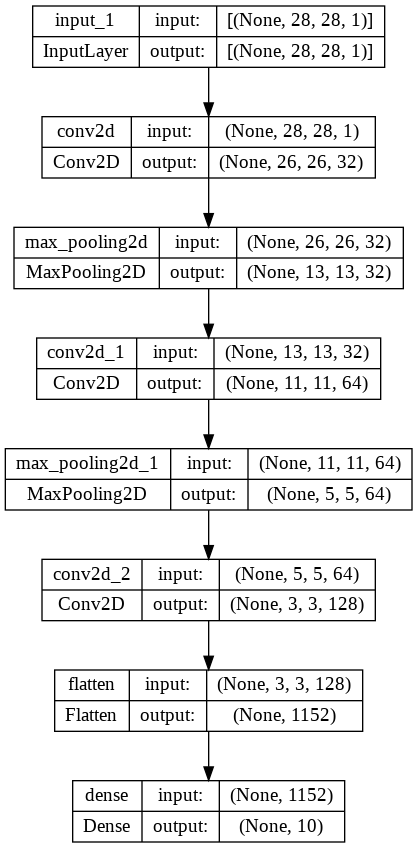

In [4]:
# model.summary()
tf.keras.utils.plot_model(model,show_shapes=True)

In [5]:
# 데이터 준비하기
# MNIST 이미지
from tensorflow.keras.datasets import mnist
import numpy as np

In [6]:
(x_train,y_train),(x_test,y_test) =  mnist.load_data()
# convolution은 3차원 텐서이기 때문에 차수를 맞춰준다.
x_train = np.expand_dims(x_train,axis = -1)
x_test = np.expand_dims(x_test,axis = -1)

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
# 데이터 스케일링
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [8]:
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 13s 4ms/step - loss: 0.1653 - accuracy: 0.9501
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0457 - accuracy: 0.9859
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0315 - accuracy: 0.9903
Epoch 4/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0242 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0194 - accuracy: 0.9937


In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0270 - accuracy: 0.9909


[0.026990029960870743, 0.9908999800682068]

#### 폴링층의누락

In [10]:
conv2 = layers.Conv2D(32,(3,3),activation='relu')(inputs)
conv2 = layers.Conv2D(64,(3,3),activation='relu')(conv2)
conv2 = layers.Conv2D(128,(3,3),activation='relu')(conv2)
conv2 = layers.Flatten()(conv2)
outputs = layers.Dense(10,activation='softmax')(conv2)
model2 = tf.keras.Model(inputs=inputs,outputs=outputs)

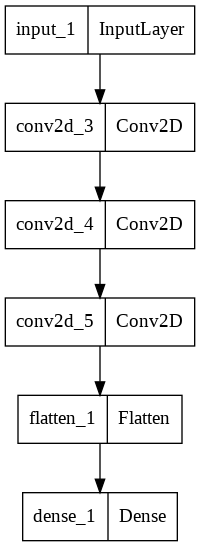

In [11]:
tf.keras.utils.plot_model(model2)

In [12]:
model2.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model2.fit(x_train,y_train,epochs=5,batch_size=64)
model2.evaluate(x_test,y_test)

Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 0.1154 - accuracy: 0.9654
Epoch 2/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0395 - accuracy: 0.9882
Epoch 3/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0253 - accuracy: 0.9922
Epoch 4/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0178 - accuracy: 0.9944
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0501 - accuracy: 0.9879


[0.05013293772935867, 0.9879000186920166]

#### 작은 데이터셋 문제에서 딥러닝의 타당성

In [ ]:
!pip install gdown

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 78.5/78.5 kB ? eta 0:00:00
  Created wheel for gdown: filename=gdown-4.5.3-py3-none-any.whl size=14821 sha256=d1aae5391565b1ca44a3d0753d4c6de67f324573703420d702b9f67349d82167
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\ed\8a\de\15273923b1f5adacc09306cc48dcedc6b082892569afb2dfc7
Successfully built gdown


In [13]:
import gdown
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

Downloading...
From: https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd
To: /content/dogs-vs-cats.zip
100%|██████████| 852M/852M [00:14<00:00, 59.1MB/s]


'dogs-vs-cats.zip'

In [ ]:
import zipfile

In [ ]:
zipfile.ZipFile('D:/leeky_ai/dogs-vs-cats.zip').extractall()
zipfile.ZipFile('D:/leeky_ai/train.zip').extractall()

In [14]:
!unzip -qq 'dogs-vs-cats.zip'

In [15]:
!unzip -qq 'train.zip'

#### 이미지를 훈련,검증,테스트 디렉터리로 복사

In [16]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [17]:
original_dir, new_base_dir

(PosixPath('train'), PosixPath('cats_vs_dogs_small'))

In [18]:
def make_subset(subset_name, start_index, end_index):
    for category in ('cat', 'dog'):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [ f"{category}.{i}.jpg" for i in range(start_index,end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir/fname, dst=dir/fname)

In [ ]:
os.chdir('D:/leeky_ai/dogs-vs-cats/train')

In [19]:
make_subset("train", start_index=0, end_index=1000)

In [20]:
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [ ]:
# 데이터 전처리  이미지 데이터를 수치형으로 변환

In [21]:
from tensorflow.keras.utils import image_dataset_from_directory

In [22]:
train_dataset =  image_dataset_from_directory(
    new_base_dir/"train"    
)
validation_dataset =  image_dataset_from_directory(
    new_base_dir/"validation"    
)
test_dataset =  image_dataset_from_directory(
    new_base_dir/"test"    
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [23]:
import numpy as np
import tensorflow as tf
random_numbers =  np.random.normal(size=(1000,16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [24]:
len(dataset)

1000

In [25]:
for i, element in enumerate(dataset):
    if i > 2: break
    print(element.shape)

(16,)
(16,)
(16,)


In [26]:
batch_dataset =  dataset.batch(32)
for i, element in enumerate(batch_dataset):
    if i>2 : break
    print(element.shape)

(32, 16)
(32, 16)
(32, 16)


In [27]:
reshape_dataset =  dataset.map(lambda x: tf.reshape(x, (4,4)))
for i, element in enumerate(reshape_dataset):
    if i>2 : break
    print(element.shape)

(4, 4)
(4, 4)
(4, 4)


#### dataset이 반환하는 데이터와 레이블 크기 확인

In [28]:
for data_batch, labels_batch in train_dataset:
    print("데이터 배치 크기:", data_batch.shape)
    print("레이블 배치 크기:",labels_batch.shape)
    break

데이터 배치 크기: (32, 256, 256, 3)
레이블 배치 크기: (32,)


#### 모델 만들기

In [29]:
from tensorflow import keras
from tensorflow.keras import layers

In [30]:
inputs = keras.Input(shape=(256, 256, 3))
x = layers.Rescaling(1/255.0)(inputs)
x = layers.Conv2D(32,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256,(3,3),activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convert_from_scratch.keras',
        save_best_only=True,
        monitor = 'val_loss'
    )
]
hist = model.fit(train_dataset,epochs=30,validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 11s 133ms/step - loss: 0.6974 - accuracy: 0.5085 - val_loss: 0.6804 - val_accuracy: 0.5690
Epoch 2/30
63/63 [==============================] - 8s 119ms/step - loss: 0.6738 - accuracy: 0.5490 - val_loss: 0.6607 - val_accuracy: 0.5780
Epoch 3/30
63/63 [==============================] - 8s 118ms/step - loss: 0.6564 - accuracy: 0.5970 - val_loss: 0.6311 - val_accuracy: 0.6440
Epoch 4/30
63/63 [==============================] - 8s 116ms/step - loss: 0.6550 - accuracy: 0.6190 - val_loss: 0.6517 - val_accuracy: 0.6240
Epoch 5/30
63/63 [==============================] - 8s 117ms/step - loss: 0.5919 - accuracy: 0.6790 - val_loss: 0.6163 - val_accuracy: 0.6480
Epoch 6/30
63/63 [==============================] - 8s 117ms/step - loss: 0.5946 - accuracy: 0.6640 - val_loss: 0.7044 - val_accuracy: 0.5720
Epoch 7/30
63/63 [==============================] - 8s 118ms/step - loss: 0.5902 - accuracy: 0.6885 - val_loss: 0.5637 - val_accuracy: 0.7110
Epoch

In [34]:
#### 훈련 정확도와  손실 그래프 그리기

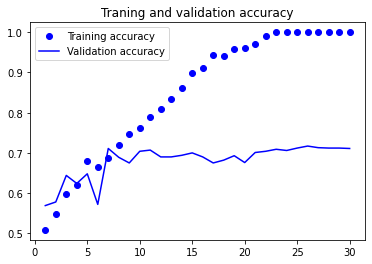

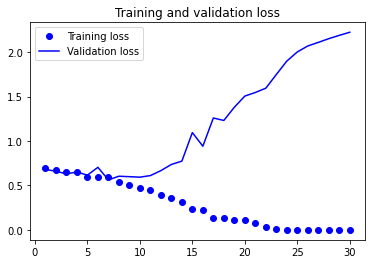

In [39]:
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Traning and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [40]:
# 오버핏... 
test_model = keras.models.load_model("convert_from_scratch.keras")
test_loss, test_acc =  test_model.evaluate(test_dataset)

63/63 [==============================] - 4s 60ms/step - loss: 0.5959 - accuracy: 0.6925


In [41]:
test_loss, test_acc 

(0.5959432721138, 0.6924999952316284)

In [42]:
# 데이터 증식기 이용.. 
# 컨볼류션에 추가할 데이터 증식 단계 정의

In [43]:
data_agumentation =  keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

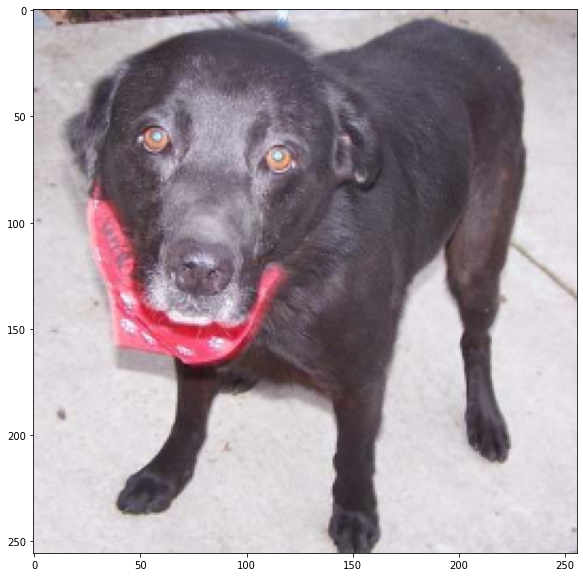

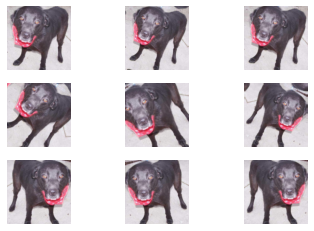

In [55]:
plt.figure(figsize=(10,10))
for imges,_ in train_dataset.take(1):
  plt.imshow(imges[0].numpy().astype('uint8'))
  plt.figure()
  for i in range(9):
    new_images = data_agumentation(imges) 
    ax = plt.subplot(3,3, i+1)
    plt.imshow(new_images[0].numpy().astype('uint8'))
    plt.axis('off')

In [57]:
# 이미지 증식과 드랍아웃을 포함한 컨볼류션
inputs = keras.Input(shape=(256, 256, 3))
x = data_agumentation(inputs)
x = layers.Rescaling(1/255.0)(x)
x = layers.Conv2D(32,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256,(3,3),activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convert_from_with_imageGenerator_scratch.keras',
        save_best_only=True,
        monitor = 'val_loss'
    )
]
hist = model.fit(train_dataset,epochs=30,validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 11s 147ms/step - loss: 0.7003 - accuracy: 0.5035 - val_loss: 0.6920 - val_accuracy: 0.5540
Epoch 2/30
63/63 [==============================] - 9s 146ms/step - loss: 0.6835 - accuracy: 0.5480 - val_loss: 0.6907 - val_accuracy: 0.5080
Epoch 3/30
63/63 [==============================] - 9s 145ms/step - loss: 0.6781 - accuracy: 0.5505 - val_loss: 0.7013 - val_accuracy: 0.5000
Epoch 4/30
63/63 [==============================] - 10s 147ms/step - loss: 0.6887 - accuracy: 0.5480 - val_loss: 0.6834 - val_accuracy: 0.5270
Epoch 5/30
63/63 [==============================] - 9s 143ms/step - loss: 0.6498 - accuracy: 0.6130 - val_loss: 0.6558 - val_accuracy: 0.5870
Epoch 6/30
63/63 [==============================] - 9s 146ms/step - loss: 0.6360 - accuracy: 0.6360 - val_loss: 0.6187 - val_accuracy: 0.6570
Epoch 7/30
63/63 [==============================] - 9s 145ms/step - loss: 0.6199 - accuracy: 0.6550 - val_loss: 0.6053 - val_accuracy: 0.6660
Epoc

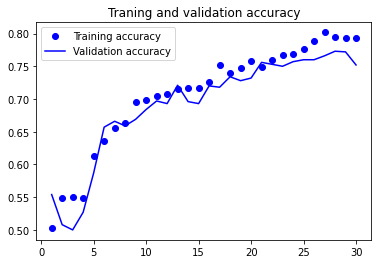

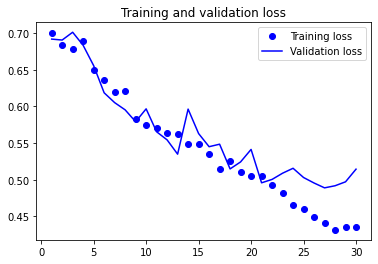

In [58]:
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Traning and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [60]:
test_model = keras.models.load_model("convert_from_with_imageGenerator_scratch.keras")
test_loss, test_acc =  test_model.evaluate(test_dataset)
test_loss, test_acc

63/63 [==============================] - 4s 54ms/step - loss: 0.4964 - accuracy: 0.7710


(0.49635231494903564, 0.7710000276565552)

In [62]:
# 사전훈련된 모델 활용
# VGG16 합성곱 기반 층 만들기

In [63]:
conv_base =  keras.applications.vgg16.VGG16(
    weights = 'imagenet',
    include_top=False,
    input_shape = (256,256,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [64]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [65]:
import numpy as np
def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 23ms/step


In [85]:
len(train_dataset)

63

In [75]:
train_features.shape,val_features.shape,test_features.shape

((2000, 8, 8, 512), (1000, 8, 8, 512), (2000, 8, 8, 512))

In [78]:
train_features[0].shape

(8, 8, 512)

In [82]:
inputs =  keras.Input(shape=(8, 8, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x) 
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1,activation = 'sigmoid')(x)
model =  keras.Model(inputs,outputs)
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics=['accuracy'])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'feature_extraction.keras',
        save_best_only = True,
        monitor = 'val_loss'
    )
    # ,keras.callbacks.EarlyStopping(patience = 5)
]

hist = model.fit(
    train_features, train_labels,
    epochs = 20,
    validation_data = (val_features,val_labels),
    callbacks = callbacks
)

Epoch 1/20
63/63 [==============================] - 1s 15ms/step - loss: 15.4129 - accuracy: 0.9285 - val_loss: 5.4466 - val_accuracy: 0.9740
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 1.7229 - accuracy: 0.9895 - val_loss: 8.2021 - val_accuracy: 0.9760
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9118 - accuracy: 0.9945 - val_loss: 8.9950 - val_accuracy: 0.9680
Epoch 4/20
63/63 [==============================] - 0s 8ms/step - loss: 0.9792 - accuracy: 0.9945 - val_loss: 11.2341 - val_accuracy: 0.9670
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 1.5566 - accuracy: 0.9935 - val_loss: 8.1498 - val_accuracy: 0.9720
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.9550 - accuracy: 0.9955 - val_loss: 6.0210 - val_accuracy: 0.9800
Epoch 7/20
63/63 [==============================] - 1s 8ms/step - loss: 1.0378 - accuracy: 0.9960 - val_loss: 7.8752 - val_accuracy: 0.9740
Epoch 8/20
63/63 

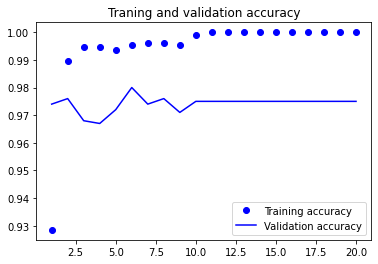

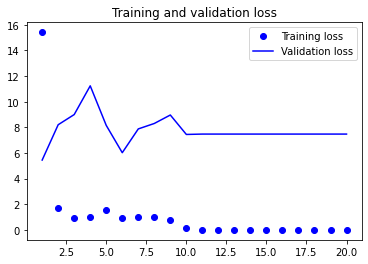

In [83]:
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Traning and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [86]:
test_model = keras.models.load_model('feature_extraction.keras')
test_model.evaluate(test_features, test_labels)

63/63 [==============================] - 0s 4ms/step - loss: 4.3282 - accuracy: 0.9830


[4.328179359436035, 0.9829999804496765]

In [87]:
# 과적합